In [65]:
!pip install sqlalchemy pandas matplotlib

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [66]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, func


In [73]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine(f"sqlite:////Users/lisashimano/Documents/UWA Data Analytics Bootcamp/sqlalchemy-challenge/Starter_Code 4/Resources/hawaii.sqlite")


In [74]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [75]:
# Print all of the classes mapped to the Base
Base.classes.keys()


['station', 'measurement']

In [76]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [77]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [78]:
# Read the CSV file into a DataFrame
file_path = "/Users/lisashimano/Documents/UWA Data Analytics Bootcamp/sqlalchemy-challenge/Starter_Code 4/Resources/hawaii_measurements.csv"
measurements_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(measurements_df.head())

       station        date  prcp  tobs
0  USC00519397  2010-01-01   2.0  18.3
1  USC00519397  2010-01-02   0.0  17.2
2  USC00519397  2010-01-03   0.0  23.3
3  USC00519397  2010-01-04   0.0  24.4
4  USC00519397  2010-01-06   NaN  22.8


In [79]:
# Convert the 'date' column to datetime format
measurements_df['date'] = pd.to_datetime(measurements_df['date'])

# Find the most recent date in the dataset
latest_date = measurements_df['date'].max()
print(f"Latest Date: {latest_date}")

Latest Date: 2017-08-23 00:00:00


One Year Ago: 2016-08-23 00:00:00
            Date  Precipitation
2363  2016-08-23            0.0
8824  2016-08-23            NaN
14607 2016-08-23           45.5
7330  2016-08-23            1.3
5090  2016-08-23            3.8


<Figure size 1000x600 with 0 Axes>

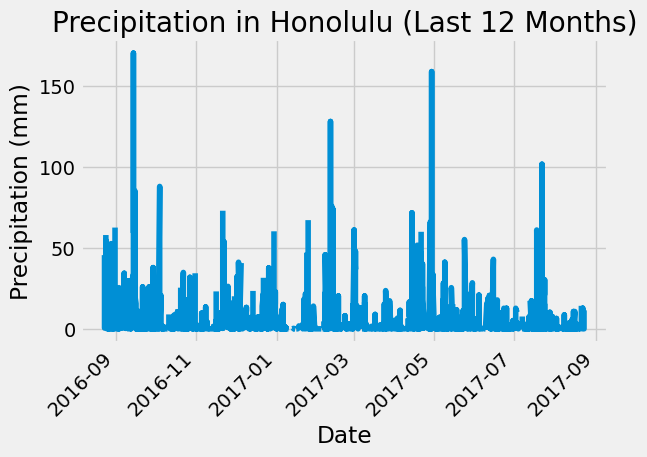

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year_ago = latest_date - pd.DateOffset(years=1)
print(f"One Year Ago: {one_year_ago}")

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Filter the data for the last 12 months
last_12_months = measurements_df[(measurements_df['date'] >= one_year_ago) & (measurements_df['date'] <= latest_date)]

# Select only the 'date' and 'prcp' columns
precipitation_df = last_12_months[['date', 'prcp']]

# Explicitly set the column names (optional, as they are already set)
precipitation_df.columns = ['Date', 'Precipitation']

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date')

# Display the DataFrame to verify
print(precipitation_df.head())

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
precipitation_df.plot(x='Date', y='Precipitation', legend=False)
plt.title('Precipitation in Honolulu (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [82]:
# Read the stations CSV file into a DataFrame
stations_file_path = "/Users/lisashimano/Documents/UWA Data Analytics Bootcamp/sqlalchemy-challenge/Starter_Code 4/Resources/hawaii_stations.csv"
stations_df = pd.read_csv(stations_file_path)

# Display the first few rows of the DataFrame to verify
print(stations_df.head())

       station                                    name  latitude  longitude  \
0  USC00519397                    WAIKIKI 717.2, HI US   21.2716  -157.8168   
1  USC00513117                    KANEOHE 838.1, HI US   21.4234  -157.8015   
2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213  -157.8374   
3  USC00517948                       PEARL CITY, HI US   21.3934  -157.9751   
4  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992  -158.0111   

   elevation  
0      0.914  
1      4.450  
2      2.133  
3      3.627  
4     93.447  


In [83]:
# Design a query to calculate the total number of stations in the dataset
total_stations = stations_df['station'].nunique()
print(f"Total Number of Stations: {total_stations}")

Total Number of Stations: 9


In [84]:
# List the stations and their counts in descending order.
station_counts = measurements_df['station'].value_counts()
print(station_counts)

# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_station_id = station_counts.idxmax()
print(f"Most Active Station ID: {most_active_station_id}")

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64
Most Active Station ID: USC00519281


In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = measurements_df[measurements_df['station'] == most_active_station_id]

lowest_temp = most_active_station_data['tobs'].min()
highest_temp = most_active_station_data['tobs'].max()
average_temp = most_active_station_data['tobs'].mean()

print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")
print(most_active_station_data)

Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.035822510822513
           station       date  prcp  tobs
12187  USC00519281 2010-01-01   3.8  21.1
12188  USC00519281 2010-01-02   0.0  16.7
12189  USC00519281 2010-01-03   0.0  23.3
12190  USC00519281 2010-01-04   0.0  23.9
12191  USC00519281 2010-01-05   0.0  23.3
...            ...        ...   ...   ...
14954  USC00519281 2017-08-14   0.0  25.0
14955  USC00519281 2017-08-15   8.1  25.0
14956  USC00519281 2017-08-16   3.0  24.4
14957  USC00519281 2017-08-17   0.3  24.4
14958  USC00519281 2017-08-18   1.5  26.1

[2772 rows x 4 columns]


Latest Date: 2017-08-23 00:00:00
One Year Ago: 2016-08-23 00:00:00
           station       date  prcp  tobs
14607  USC00519281 2016-08-23  45.5  25.0
14608  USC00519281 2016-08-24  54.6  25.0
14609  USC00519281 2016-08-25   1.5  26.7
14610  USC00519281 2016-08-26   0.3  26.7
14611  USC00519281 2016-08-27   3.0  23.9


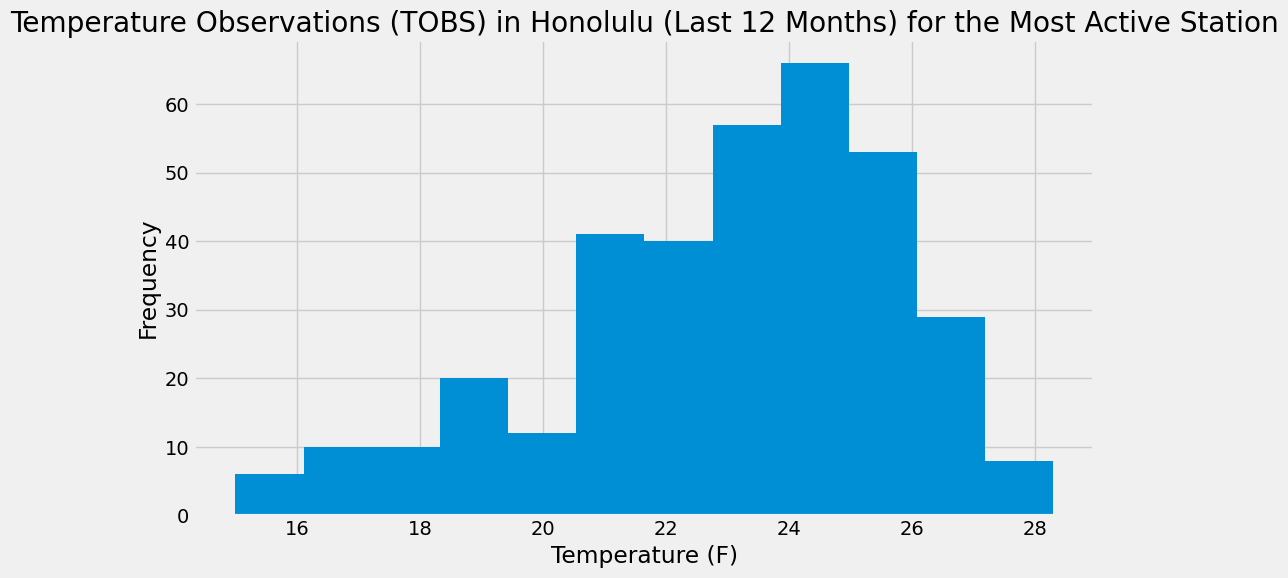

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Convert the 'date' column to datetime format
measurements_df['date'] = pd.to_datetime(measurements_df['date'])

# Find the most recent date in the dataset
latest_date = measurements_df['date'].max()
print(f"Latest Date: {latest_date}")

# Calculate the date 1 year ago from the latest date
one_year_ago = latest_date - pd.DateOffset(years=1)
print(f"One Year Ago: {one_year_ago}")

# Filter the data for the last 12 months for the most-active station
tobs_last_12_months = measurements_df[(measurements_df['station'] == most_active_station_id) &
                                      (measurements_df['date'] >= one_year_ago) &
                                      (measurements_df['date'] <= latest_date)]

# Display the DataFrame to verify
print(tobs_last_12_months.head())

# Plot the TOBS data as a histogram with bins=12
plt.figure(figsize=(10, 6))
tobs_last_12_months['tobs'].plot(kind='hist', bins=12)
plt.title('Temperature Observations (TOBS) in Honolulu (Last 12 Months) for the Most Active Station')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [87]:
# Close Session
session.close()
